# Import data and stuff

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data_df = pd.read_csv('./run2.csv')
data_df = data_df[data_df["speed_avg"] < 600]
data_df = data_df[["duty_cycle","speed_avg"]]
X = data_df.to_numpy()

In [3]:
data_df.corr()

,duty_cycle,speed_avg
duty_cycle,1.000000,0.869815
speed_avg,0.869815,1.000000


In [4]:
data_df

,duty_cycle,speed_avg
0,47,246.428158
1,45,259.895864
2,42,270.464729
3,42,281.724724
4,41,301.669997
...,...,...
4005,100,530.234599
4006,100,537.594669
4007,100,537.241391
4008,100,534.906953


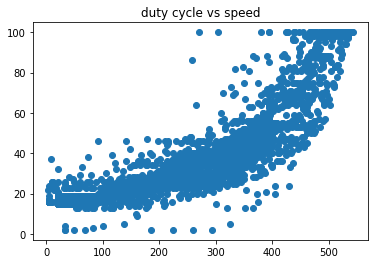

In [5]:
plt.figure()
plt.title("duty cycle vs speed")
plt.scatter(X[:,1],X[:,0]);

Given this correlation, `duty_cycle` and `speed_avg` are well correlated, but not perfectly.

In [6]:
linreg = LinearRegression()
voltage = X[:,0].reshape(-1,1)
speed = X[:,1].reshape(-1,1)
linreg.fit(speed,voltage)
predicted_voltage = linreg.predict(speed)
linreg.score(speed,voltage)

0.7565777246563734

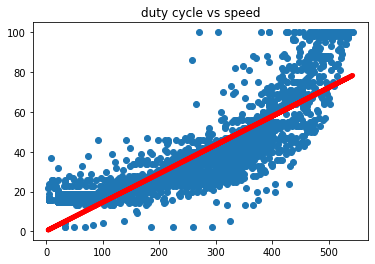

In [7]:
plt.figure()
plt.title("duty cycle vs speed")
plt.scatter(speed,voltage)
plt.plot(speed,predicted_voltage,color="red",linewidth=5.0);

In [8]:
np.sqrt(np.mean((predicted_voltage-voltage)**2))

10.790383704548834

Not a bad RMSE, but about 10% off is a lot.

### Normalize for neuralnets

In [10]:
speed_scaler = MinMaxScaler()
speed_scaler.fit(speed)
speed_scaled = speed_scaler.transform(speed)

In [12]:
model = keras.Sequential(
    [
        keras.Input(shape=(1,)),
        layers.Dense(12, activation="sigmoid", name="layer1"),
        layers.Dense(1, name='out', activation='sigmoid')
    ]
)
model.summary()
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 12)                24        
                                                                 
 out (Dense)                 (None, 1)                 13        
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


2022-04-20 09:20:00.923588: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-20 09:20:00.923669: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-20 09:20:00.925035: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (penguin): /proc/driver/nvidia/version does not exist
2022-04-20 09:20:00.925640: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.fit(speed_scaled, voltage / 100, epochs=250)

Epoch 1/250
125/125 [==============================] - 2s 6ms/step - loss: 0.0442
Epoch 2/250
125/125 [==============================] - 1s 7ms/step - loss: 0.0207
Epoch 3/250
125/125 [==============================] - 1s 7ms/step - loss: 0.0115
Epoch 4/250
125/125 [==============================] - 1s 4ms/step - loss: 0.0102
Epoch 5/250
125/125 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 6/250
125/125 [==============================] - 1s 4ms/step - loss: 0.0097
Epoch 7/250
125/125 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 8/250
125/125 [==============================] - 1s 4ms/step - loss: 0.0093
Epoch 9/250
125/125 [==============================] - 0s 4ms/step - loss: 0.0091
Epoch 10/250
125/125 [==============================] - 1s 4ms/step - loss: 0.0090
Epoch 11/250
125/125 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 12/250
125/125 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 13/250


125/125 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 197/250
125/125 [==============================] - 1s 4ms/step - loss: 0.0055
Epoch 198/250
125/125 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 199/250
125/125 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 200/250
125/125 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 201/250
125/125 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 202/250
125/125 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 203/250
125/125 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 204/250
125/125 [==============================] - 1s 4ms/step - loss: 0.0055
Epoch 205/250
125/125 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 206/250
125/125 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 207/250
125/125 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 

### Plotting the neural net output

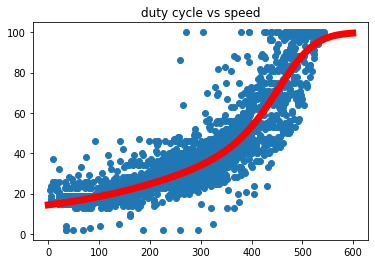

In [15]:
test_a = speed_scaler.transform(np.array(range(600)).reshape(-1,1))
predicted_voltage = model.predict(test_a) * 100
# Y = min_max_scaler_b.inverse_transform(Y_scaled)

plt.figure()
plt.title("duty cycle vs speed")
plt.scatter(speed,voltage)
plt.plot(np.array(range(600)).reshape(-1,1),predicted_voltage,color="red",linewidth=7.0);

In [16]:
predicted_voltage = model.predict(speed_scaler.transform(speed)) * 100
np.sqrt(np.mean((predicted_voltage-voltage)**2))

7.45085063608977

Slightly better. 7.5% off though.

# With acceleration

Maybe acceleration gives us more context?

In [19]:
data_df = pd.read_csv('./run2.csv')
data_df = data_df[data_df["speed_avg"] < 600]
data_df = data_df[["duty_cycle","acc","speed_avg"]]
X = data_df.to_numpy()

### Linreg again

In [23]:
linreg = LinearRegression()
voltage = X[:,0].reshape(-1,1)
X_actual = X[:,1:]
linreg.fit(X_actual,voltage)
predicted_voltage = linreg.predict(X_actual)
linreg.score(X_actual,voltage)

0.7583845405246178

In [24]:
np.sqrt(np.mean((predicted_voltage-voltage)**2))

10.750262993837906

So linear regression doesn't really do any better.

### Neural net again

In [25]:
model = keras.Sequential(
    [
        keras.Input(shape=(2,)),
        layers.Dense(12, activation="sigmoid", name="layer1"),
        layers.Dense(1, name='out', activation='sigmoid')
    ]
)
model.summary()
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 12)                36        
                                                                 
 out (Dense)                 (None, 1)                 13        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [26]:
X_scaler = MinMaxScaler()
X_scaler.fit(X_actual)
X_scaled = X_scaler.transform(X_actual)

In [28]:
X_scaler.data_max_, X_scaler.data_min_, X_scaler.data_range_

(array([  4.73178413, 542.65274408]),
 array([-4.02297436,  3.8461747 ]),
 array([  8.75475849, 538.80656938]))

In [29]:
model.fit(X_scaled, voltage / 100, epochs=250)

Epoch 1/250
125/125 [==============================] - 1s 3ms/step - loss: 0.0380
Epoch 2/250
125/125 [==============================] - 0s 4ms/step - loss: 0.0158
Epoch 3/250
125/125 [==============================] - 0s 4ms/step - loss: 0.0111
Epoch 4/250
125/125 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 5/250
125/125 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 6/250
125/125 [==============================] - 0s 4ms/step - loss: 0.0101
Epoch 7/250
125/125 [==============================] - 0s 4ms/step - loss: 0.0098
Epoch 8/250
125/125 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 9/250
125/125 [==============================] - 0s 3ms/step - loss: 0.0094
Epoch 10/250
125/125 [==============================] - 0s 4ms/step - loss: 0.0093
Epoch 11/250
125/125 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 12/250
125/125 [==============================] - 0s 4ms/step - loss: 0.0088
Epoch 13/250


125/125 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 197/250
125/125 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 198/250
125/125 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 199/250
125/125 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 200/250
125/125 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 201/250
125/125 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 202/250
125/125 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 203/250
125/125 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 204/250
125/125 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 205/250
125/125 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 206/250
125/125 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 207/250
125/125 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 

In [30]:
predicted_voltage = model.predict(X_scaled) * 100
np.sqrt(np.mean((predicted_voltage-voltage)**2))

7.261677550334719

Rmse is a bit better. Still not amazing.

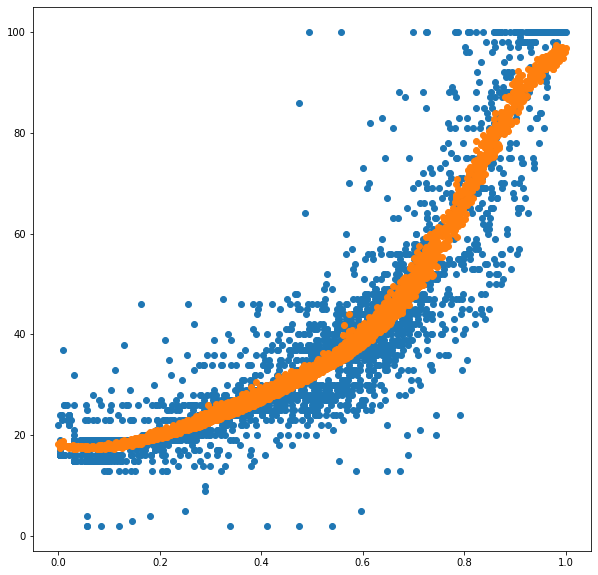

In [31]:
speed = X_scaled[:,1]
plt.figure(figsize=(10,10))
plt.scatter(speed, voltage)
plt.scatter(speed, predicted_voltage)

A tiny bit better now. The graph has a nicer spread.

# Basic RNN

An RNN would probably be great here. Let's try.

### Define lookback as `N`

In [36]:
N = 10

### Let's try a simple RNN first.

In [146]:
model = keras.Sequential(
    [
        keras.Input(shape=(N,2)),
        layers.SimpleRNN(12, name="rnnlayer"),
        layers.Dense(12, activation="sigmoid", name="layer2"),
        layers.Dense(1, name='out', activation='sigmoid')
    ]
)
model.summary()
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rnnlayer (SimpleRNN)        (None, 12)                180       
                                                                 
 layer2 (Dense)              (None, 12)                156       
                                                                 
 out (Dense)                 (None, 1)                 13        
                                                                 
Total params: 349
Trainable params: 349
Non-trainable params: 0
_________________________________________________________________


### Get continuous sequences from the data

The data has splits in it whenver a turn was made, so we need to find the parts that are continuous to train on.

### Build training data from the continuous sequences

In [147]:
data_df = pd.read_csv('./run2.csv')
data_df = data_df[data_df["speed_avg"] < 600]
data_df = data_df[["ts","duty_cycle","acc","speed_avg"]]
X = data_df.to_numpy()

timestamps = X[:,0] 
ts_diffs = timestamps[1:] - timestamps[:-1]

sequences = []
current_sequence = []

for i, diff in enumerate(ts_diffs):
    if diff < 101:
        current_sequence.append(i)
    else:
        if len(current_sequence) > N * 2:
            sequences.append(current_sequence)
        current_sequence = [i]
        
print(len(sequences))

X_relevant = X[:,2:]
Xs_scaler = MinMaxScaler()
Xs_scaler.fit(X_relevant)
X_relevant = Xs_scaler.transform(X_relevant)

# for sequence in sequences:
from sklearn.utils import shuffle

all_Xs = []
all_Ys = []
for sequence in sequences[:]:
#     if len(sequence) < 100:
#         continue
    Xs = []
    Ys = []
    for n in sequence[N:]:
        indexes_x = np.arange(n-N,n)
        index_y = n
        Ys.append(X[index_y,1])
        Xs.append(X_relevant[indexes_x])
    all_Xs += Xs
    all_Ys += Ys

all_Xs = np.array(all_Xs)
all_Ys = np.array(all_Ys).reshape(-1,1)

all_Xs, all_Ys = shuffle(all_Xs,all_Ys)

print(all_Xs.shape, all_Ys.shape)

38
(3793, 3, 2) (3793, 1)


In [148]:
model.fit(all_Xs, all_Ys/100, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
119/119 [==============================] - 1s 2ms/step - loss: 0.0164
Epoch 2/100
119/119 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 3/100
119/119 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 4/100
119/119 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 5/100
119/119 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 6/100
119/119 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 7/100
119/119 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 8/100
119/119 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 9/100
119/119 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 10/100
119/119 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 11/100
119/119 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 12/100
119/119 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 13/100


In [145]:
rmse_sum = 0
num = 0

original_x = []
original_y = []
pred_y = []

for sequence in sequences[:]:
    print()
    X_sequence = X[np.array(sequence)]
    Xs = []
    Ys = []
    OgX = []
    for n in sequence[N:]:
        indexes_x = np.arange(n-N,n)
        index_y = n
        Ys.append(X[index_y,1])
        OgX.append(X[index_y,3])
        Xs.append(X_relevant[indexes_x])
    Xs = np.array(Xs)
    Ys = np.array(Ys).reshape(-1,1)
    print(f"len: {len(sequence)}, mean: {Ys.mean()}, std: {Ys.std()}")
    voltages_pred = model.predict(Xs) * 100
    
    original_x += OgX
    pred_y += list(voltages_pred.flatten())
    original_y += list(Ys.flatten())
    
    rmse = np.sqrt(np.mean((voltages_pred - Ys)**2))
    rmse_sum += (rmse * len(sequence))
    num += len(sequence)
    print(f"rmse: {rmse:.2f}")

print(len(original_x), len(original_y))
rmse_sum / num


len: 128, mean: 40.68, std: 8.46319088760262


ValueError: in user code:

    File "/home/drg101/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "/home/drg101/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/drg101/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "/home/drg101/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1572, in predict_step
        return self(x, training=False)
    File "/home/drg101/.local/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/drg101/.local/lib/python3.9/site-packages/keras/engine/input_spec.py", line 247, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_15" (type Sequential).
    
    Input 0 of layer "layer1" is incompatible with the layer: expected axis -1of input shape to have value 3, but received input with shape (None, 3, 2)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 3, 2), dtype=float32)
      • training=False
      • mask=None


Rmse of 4.1 is much better!

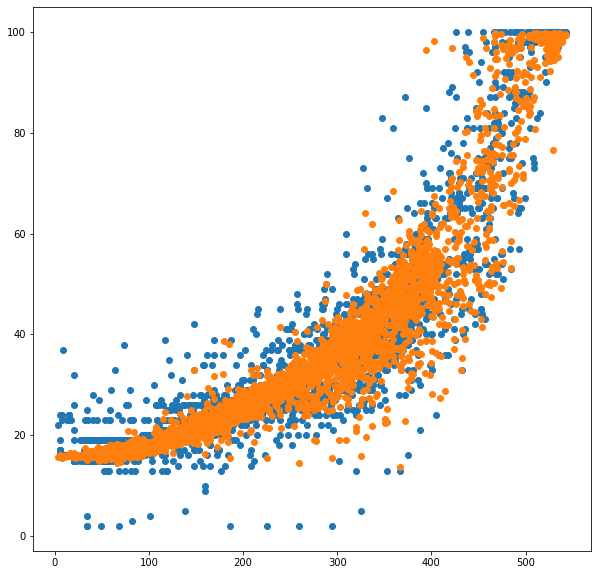

In [42]:
plt.figure(figsize=(10,10))
plt.scatter(original_x, original_y)
plt.scatter(original_x, pred_y)

In [43]:
from keras.models import save_model

save_model(model, "best_model_ever.h5")

### Lets try lstm

In [44]:
model = keras.Sequential(
    [
        keras.Input(shape=(N,2)),
        layers.LSTM(12, name="rnnlayer"),
        layers.Dense(12, activation="sigmoid", name="layer2"),
        layers.Dense(1, name='out', activation='sigmoid')
    ]
)
model.summary()
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rnnlayer (LSTM)             (None, 12)                720       
                                                                 
 layer2 (Dense)              (None, 12)                156       
                                                                 
 out (Dense)                 (None, 1)                 13        
                                                                 
Total params: 889
Trainable params: 889
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.fit(all_Xs, all_Ys/100, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
110/110 [==============================] - 5s 11ms/step - loss: 0.0184
Epoch 2/100
110/110 [==============================] - 1s 12ms/step - loss: 0.0091
Epoch 3/100
110/110 [==============================] - 1s 11ms/step - loss: 0.0062
Epoch 4/100
110/110 [==============================] - 1s 12ms/step - loss: 0.0048
Epoch 5/100
110/110 [==============================] - 1s 12ms/step - loss: 0.0043
Epoch 6/100
110/110 [==============================] - 1s 11ms/step - loss: 0.0038
Epoch 7/100
110/110 [==============================] - 1s 10ms/step - loss: 0.0035
Epoch 8/100
110/110 [==============================] - 1s 12ms/step - loss: 0.0036
Epoch 9/100
110/110 [==============================] - 1s 12ms/step - loss: 0.0033
Epoch 10/100
110/110 [==============================] - 1s 11ms/step - loss: 0.0032
Epoch 11/100
110/110 [==============================] - 1s 13ms/step - loss: 0.0029
Epoch 12/100
110/110 [==============================] - 1s 13ms/step - loss: 0.0029
E

In [46]:
rmse_sum = 0
num = 0

original_x = []
original_y = []
pred_y = []

for sequence in sequences[:]:
    print()
    X_sequence = X[np.array(sequence)]
    Xs = []
    Ys = []
    OgX = []
    for n in sequence[N:]:
        indexes_x = np.arange(n-N,n)
        index_y = n
        Ys.append(X[index_y,1])
        OgX.append(X[index_y,3])
        Xs.append(X_relevant[indexes_x])
    Xs = np.array(Xs)
    Ys = np.array(Ys).reshape(-1,1)
    print(f"len: {len(sequence)}, mean: {Ys.mean()}, std: {Ys.std()}")
    voltages_pred = model.predict(Xs) * 100
    
    original_x += OgX
    pred_y += list(voltages_pred.flatten())
    original_y += list(Ys.flatten())
    
    rmse = np.sqrt(np.mean((voltages_pred - Ys)**2))
    rmse_sum += (rmse * len(sequence))
    num += len(sequence)
    print(f"rmse: {rmse:.2f}")

print(len(original_x), len(original_y))
rmse_sum / num


len: 128, mean: 40.567796610169495, std: 8.68319906443074
rmse: 4.20

len: 124, mean: 43.12280701754386, std: 5.454983800251233
rmse: 3.43

len: 276, mean: 35.53007518796993, std: 10.800699538486503
rmse: 4.32

len: 131, mean: 47.37190082644628, std: 23.489801631439537
rmse: 8.61

len: 99, mean: 18.786516853932586, std: 4.746310004014732
rmse: 3.32

len: 599, mean: 19.3616298811545, std: 2.099386617232461
rmse: 1.73

len: 195, mean: 24.12972972972973, std: 5.732263590668169
rmse: 2.89

len: 101, mean: 29.01098901098901, std: 3.296666666463164
rmse: 2.04

len: 68, mean: 26.103448275862068, std: 3.822301415298587
rmse: 1.77

len: 40, mean: 23.5, std: 0.5
rmse: 1.11

len: 63, mean: 27.943396226415093, std: 3.074024430855291
rmse: 2.87

len: 33, mean: 27.0, std: 0.0
rmse: 1.65

len: 85, mean: 27.0, std: 0.0
rmse: 1.64

len: 310, mean: 34.483333333333334, std: 20.11706710454804
rmse: 4.02

len: 90, mean: 61.125, std: 30.45298630676473
rmse: 8.63

len: 53, mean: 52.02325581395349, std: 19.6

3.9182712199042244

Even better!

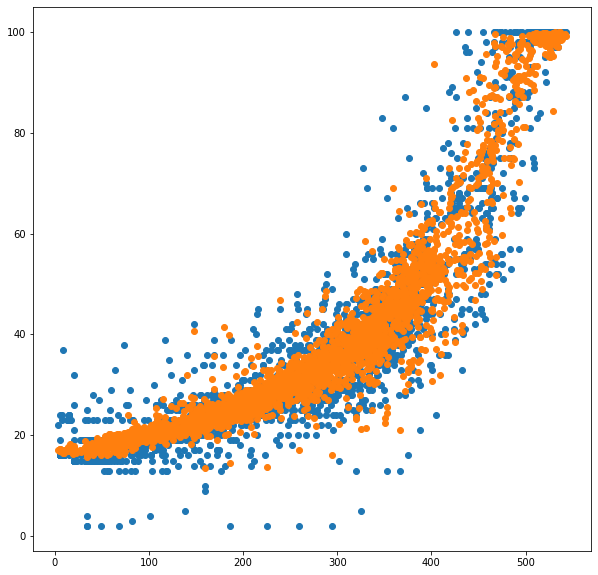

In [48]:
plt.figure(figsize=(10,10))
plt.scatter(original_x, original_y)
plt.scatter(original_x, pred_y)

### Overkill LSTM

Our RNN clearly fits our data pretty well. Let's make it much bigger and see how it does.

In [52]:
model = keras.Sequential(
    [
        keras.Input(shape=(N,2)),
        layers.LSTM(64, name="rnnlayer"),
        layers.Dense(64, activation="relu", name="layer1"),
        layers.Dense(128, activation="relu", name="layer2"),
        layers.Dense(64, activation="relu", name="layer3"),
        layers.Dense(1, name='out', activation='sigmoid')
    ]
)
model.summary()
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rnnlayer (LSTM)             (None, 64)                17152     
                                                                 
 layer1 (Dense)              (None, 64)                4160      
                                                                 
 layer2 (Dense)              (None, 128)               8320      
                                                                 
 layer3 (Dense)              (None, 64)                8256      
                                                                 
 out (Dense)                 (None, 1)                 65        
                                                                 
Total params: 37,953
Trainable params: 37,953
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.fit(all_Xs, all_Ys/100, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
110/110 [==============================] - 6s 13ms/step - loss: 0.0136
Epoch 2/100
110/110 [==============================] - 1s 13ms/step - loss: 0.0043
Epoch 3/100
110/110 [==============================] - 2s 14ms/step - loss: 0.0046
Epoch 4/100
110/110 [==============================] - 1s 14ms/step - loss: 0.0048
Epoch 5/100
110/110 [==============================] - 2s 14ms/step - loss: 0.0035
Epoch 6/100
110/110 [==============================] - 2s 16ms/step - loss: 0.0038
Epoch 7/100
110/110 [==============================] - 2s 14ms/step - loss: 0.0035
Epoch 8/100
110/110 [==============================] - 1s 13ms/step - loss: 0.0030
Epoch 9/100
110/110 [==============================] - 1s 13ms/step - loss: 0.0034
Epoch 10/100
110/110 [==============================] - 2s 14ms/step - loss: 0.0030
Epoch 11/100
110/110 [==============================] - 1s 13ms/step - loss: 0.0030
Epoch 12/100
110/110 [==============================] - 1s 13ms/step - loss: 0.0030
E

In [54]:
rmse_sum = 0
num = 0

original_x = []
original_y = []
pred_y = []

for sequence in sequences[:]:
    print()
    X_sequence = X[np.array(sequence)]
    Xs = []
    Ys = []
    OgX = []
    for n in sequence[N:]:
        indexes_x = np.arange(n-N,n)
        index_y = n
        Ys.append(X[index_y,1])
        OgX.append(X[index_y,3])
        Xs.append(X_relevant[indexes_x])
    Xs = np.array(Xs)
    Ys = np.array(Ys).reshape(-1,1)
    print(f"len: {len(sequence)}, mean: {Ys.mean()}, std: {Ys.std()}")
    voltages_pred = model.predict(Xs) * 100
    
    original_x += OgX
    pred_y += list(voltages_pred.flatten())
    original_y += list(Ys.flatten())
    
    rmse = np.sqrt(np.mean((voltages_pred - Ys)**2))
    rmse_sum += (rmse * len(sequence))
    num += len(sequence)
    print(f"rmse: {rmse:.2f}")

print(len(original_x), len(original_y))
rmse_sum / num


len: 128, mean: 40.567796610169495, std: 8.68319906443074
rmse: 4.27

len: 124, mean: 43.12280701754386, std: 5.454983800251233
rmse: 3.54

len: 276, mean: 35.53007518796993, std: 10.800699538486503
rmse: 4.37

len: 131, mean: 47.37190082644628, std: 23.489801631439537
rmse: 7.89

len: 99, mean: 18.786516853932586, std: 4.746310004014732
rmse: 2.71

len: 599, mean: 19.3616298811545, std: 2.099386617232461
rmse: 2.17

len: 195, mean: 24.12972972972973, std: 5.732263590668169
rmse: 2.72

len: 101, mean: 29.01098901098901, std: 3.296666666463164
rmse: 2.41

len: 68, mean: 26.103448275862068, std: 3.822301415298587
rmse: 2.07

len: 40, mean: 23.5, std: 0.5
rmse: 1.72

len: 63, mean: 27.943396226415093, std: 3.074024430855291
rmse: 3.03

len: 33, mean: 27.0, std: 0.0
rmse: 1.78

len: 85, mean: 27.0, std: 0.0
rmse: 1.48

len: 310, mean: 34.483333333333334, std: 20.11706710454804
rmse: 3.73

len: 90, mean: 61.125, std: 30.45298630676473
rmse: 7.74

len: 53, mean: 52.02325581395349, std: 19.6

3.8929495386110973

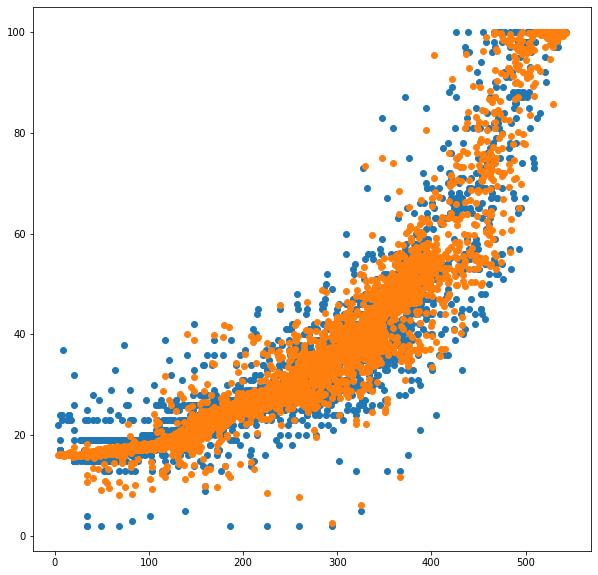

In [55]:
plt.figure(figsize=(10,10))
plt.scatter(original_x, original_y)
plt.scatter(original_x, pred_y)

Really not any better. Not worth the extra computation. Especially since we are doing the computation on the fly.

# A different approach

These approaches have a fatal flaw in the real world. What is the input for `speed` during inference?

In the real world, we have an "actual speed" and a "desired speed"

- actual speed = speed measured by the speed sensor on the vehicle
- desired speed = speed that is being asked for

For our supervised approach, we can assume that the "desired speed" for timestep $X$ is the "actual speed" at timestep $X + N$ where $N$ is how long it takes for a desire to become a reality for a human. 

Let's search for the best $N$ (how long for a desire to become actual).

To do this, we will use the same methods as the previous RNN examples, but instead of creating data with "look back" we instead will have single points with actual/desired based on the defined $N$.

In [32]:
data_df = pd.read_csv('./run2.csv')
data_df = data_df[data_df["speed_avg"] < 600]
data_df = data_df[["ts","duty_cycle","acc","speed_avg"]]
X = data_df.to_numpy()

results = []

def get_data_n(N):
    timestamps = X[:,0] 
    ts_diffs = timestamps[1:] - timestamps[:-1]

    X_relevant = X[:,2:]
    Xs_scaler = MinMaxScaler()
    Xs_scaler.fit(X_relevant)
    X_relevant = Xs_scaler.transform(X_relevant)

    sequences = []
    current_sequence = []

    for i, diff in enumerate(ts_diffs):
        if diff < 101:
            current_sequence.append(i)
        else:
            if len(current_sequence) > N * 2:
                sequences.append(current_sequence)
            current_sequence = [i]

    print(f'num cont sequences is {len(sequences)}')

    # for sequence in sequences:
    from sklearn.model_selection import train_test_split

    all_Xs = []
    all_Ys = []
    for sequence in sequences[:]:
        Xs = []
        Ys = []
        for n in sequence[:-N]:
            index_actual = n
            index_desired = n + N
            Ys.append(X[index_actual,1])
            x_val = np.hstack((X_relevant[index_actual],X_relevant[index_desired, 1]))
    #         print(x_val)
            Xs.append(x_val)
        all_Xs += Xs
        all_Ys += Ys

    all_Xs = np.array(all_Xs)
    all_Ys = np.array(all_Ys).reshape(-1,1)
    return all_Xs, all_Ys

def test_n(N, verbose=0):
    all_Xs,all_Ys = get_data_n(N)

    train_Xs, test_Xs, train_Ys, test_Ys  = train_test_split(all_Xs, all_Ys, test_size=0.25, random_state=42)
    
    # -------------
    
    model = keras.Sequential(
        [
            keras.Input(shape=(3,)),
            layers.Dense(6, activation="sigmoid", name="layer1"),
            layers.Dense(6, activation="sigmoid", name="layer2"),
            layers.Dense(6, activation="sigmoid", name="layer3"),
            layers.Dense(1, name='out', activation='sigmoid')
        ]
    )
#     model.summary()
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='mean_squared_error', optimizer=opt)
    
    model.fit(train_Xs, train_Ys/100, epochs=5000, batch_size=32, verbose=verbose)
    
    train_predicted_voltage = model.predict(train_Xs) * 100
    train_rmse = np.sqrt(np.mean((train_predicted_voltage-train_Ys)**2))
    
    test_predicted_voltage = model.predict(test_Xs) * 100
    test_rmse = np.sqrt(np.mean((test_predicted_voltage-test_Ys)**2))
    
    results.append([N,train_rmse,test_rmse])
    print(f"{N} got {train_rmse} - {test_rmse}")
    return model


In [16]:
model = test_n(3,verbose=1)

num cont sequences is 38
Epoch 1/5000
89/89 [==============================] - 0s 824us/step - loss: 0.0417
Epoch 2/5000
89/89 [==============================] - 0s 787us/step - loss: 0.0302
Epoch 3/5000
89/89 [==============================] - 0s 788us/step - loss: 0.0145
Epoch 4/5000
89/89 [==============================] - 0s 784us/step - loss: 0.0096
Epoch 5/5000
89/89 [==============================] - 0s 787us/step - loss: 0.0074
Epoch 6/5000
89/89 [==============================] - 0s 790us/step - loss: 0.0060
Epoch 7/5000
89/89 [==============================] - 0s 789us/step - loss: 0.0051
Epoch 8/5000
89/89 [==============================] - 0s 787us/step - loss: 0.0044
Epoch 9/5000
89/89 [==============================] - 0s 788us/step - loss: 0.0039
Epoch 10/5000
89/89 [==============================] - 0s 788us/step - loss: 0.0036
Epoch 11/5000
89/89 [==============================] - 0s 785us/step - loss: 0.0033
Epoch 12/5000
89/89 [==============================] - 0s 78

89/89 [==============================] - 0s 779us/step - loss: 0.0014
Epoch 99/5000
89/89 [==============================] - 0s 777us/step - loss: 0.0014
Epoch 100/5000
89/89 [==============================] - 0s 781us/step - loss: 0.0014
Epoch 101/5000
89/89 [==============================] - 0s 780us/step - loss: 0.0014
Epoch 102/5000
89/89 [==============================] - 0s 780us/step - loss: 0.0014
Epoch 103/5000
89/89 [==============================] - 0s 781us/step - loss: 0.0014
Epoch 104/5000
89/89 [==============================] - 0s 780us/step - loss: 0.0014
Epoch 105/5000
89/89 [==============================] - 0s 774us/step - loss: 0.0014
Epoch 106/5000
89/89 [==============================] - 0s 783us/step - loss: 0.0014
Epoch 107/5000
89/89 [==============================] - 0s 788us/step - loss: 0.0014
Epoch 108/5000
89/89 [==============================] - 0s 788us/step - loss: 0.0014
Epoch 109/5000
89/89 [==============================] - 0s 795us/step - loss: 0.0

89/89 [==============================] - 0s 777us/step - loss: 0.0014
Epoch 195/5000
89/89 [==============================] - 0s 774us/step - loss: 0.0014
Epoch 196/5000
89/89 [==============================] - 0s 769us/step - loss: 0.0014
Epoch 197/5000
89/89 [==============================] - 0s 767us/step - loss: 0.0013
Epoch 198/5000
89/89 [==============================] - 0s 768us/step - loss: 0.0013
Epoch 199/5000
89/89 [==============================] - 0s 769us/step - loss: 0.0013
Epoch 200/5000
89/89 [==============================] - 0s 766us/step - loss: 0.0013
Epoch 201/5000
89/89 [==============================] - 0s 769us/step - loss: 0.0014
Epoch 202/5000
89/89 [==============================] - 0s 763us/step - loss: 0.0013
Epoch 203/5000
89/89 [==============================] - 0s 766us/step - loss: 0.0013
Epoch 204/5000
89/89 [==============================] - 0s 765us/step - loss: 0.0013
Epoch 205/5000
89/89 [==============================] - 0s 766us/step - loss: 0.

89/89 [==============================] - 0s 782us/step - loss: 0.0013
Epoch 291/5000
89/89 [==============================] - 0s 787us/step - loss: 0.0013
Epoch 292/5000
89/89 [==============================] - 0s 785us/step - loss: 0.0013
Epoch 293/5000
89/89 [==============================] - 0s 775us/step - loss: 0.0013
Epoch 294/5000
89/89 [==============================] - 0s 783us/step - loss: 0.0013
Epoch 295/5000
89/89 [==============================] - 0s 783us/step - loss: 0.0013
Epoch 296/5000
89/89 [==============================] - 0s 782us/step - loss: 0.0013
Epoch 297/5000
89/89 [==============================] - 0s 789us/step - loss: 0.0013
Epoch 298/5000
89/89 [==============================] - 0s 786us/step - loss: 0.0013
Epoch 299/5000
89/89 [==============================] - 0s 793us/step - loss: 0.0013
Epoch 300/5000
89/89 [==============================] - 0s 776us/step - loss: 0.0013
Epoch 301/5000
89/89 [==============================] - 0s 785us/step - loss: 0.

89/89 [==============================] - 0s 772us/step - loss: 0.0013
Epoch 387/5000
89/89 [==============================] - 0s 786us/step - loss: 0.0013
Epoch 388/5000
89/89 [==============================] - 0s 775us/step - loss: 0.0013
Epoch 389/5000
89/89 [==============================] - 0s 774us/step - loss: 0.0013
Epoch 390/5000
89/89 [==============================] - 0s 778us/step - loss: 0.0013
Epoch 391/5000
89/89 [==============================] - 0s 775us/step - loss: 0.0013
Epoch 392/5000
89/89 [==============================] - 0s 775us/step - loss: 0.0013
Epoch 393/5000
89/89 [==============================] - 0s 769us/step - loss: 0.0013
Epoch 394/5000
89/89 [==============================] - 0s 777us/step - loss: 0.0013
Epoch 395/5000
89/89 [==============================] - 0s 774us/step - loss: 0.0013
Epoch 396/5000
89/89 [==============================] - 0s 778us/step - loss: 0.0013
Epoch 397/5000
89/89 [==============================] - 0s 771us/step - loss: 0.

89/89 [==============================] - 0s 773us/step - loss: 0.0013
Epoch 483/5000
89/89 [==============================] - 0s 782us/step - loss: 0.0013
Epoch 484/5000
89/89 [==============================] - 0s 779us/step - loss: 0.0013
Epoch 485/5000
89/89 [==============================] - 0s 772us/step - loss: 0.0013
Epoch 486/5000
89/89 [==============================] - 0s 781us/step - loss: 0.0013
Epoch 487/5000
89/89 [==============================] - 0s 776us/step - loss: 0.0013
Epoch 488/5000
89/89 [==============================] - 0s 774us/step - loss: 0.0013
Epoch 489/5000
89/89 [==============================] - 0s 776us/step - loss: 0.0013
Epoch 490/5000
89/89 [==============================] - 0s 776us/step - loss: 0.0014
Epoch 491/5000
89/89 [==============================] - 0s 768us/step - loss: 0.0013
Epoch 492/5000
89/89 [==============================] - 0s 771us/step - loss: 0.0012
Epoch 493/5000
89/89 [==============================] - 0s 773us/step - loss: 0.

89/89 [==============================] - 0s 775us/step - loss: 0.0013
Epoch 579/5000
89/89 [==============================] - 0s 782us/step - loss: 0.0013
Epoch 580/5000
89/89 [==============================] - 0s 776us/step - loss: 0.0013
Epoch 581/5000
89/89 [==============================] - 0s 780us/step - loss: 0.0013
Epoch 582/5000
89/89 [==============================] - 0s 773us/step - loss: 0.0013
Epoch 583/5000
89/89 [==============================] - 0s 764us/step - loss: 0.0013
Epoch 584/5000
89/89 [==============================] - 0s 765us/step - loss: 0.0013
Epoch 585/5000
89/89 [==============================] - 0s 766us/step - loss: 0.0013
Epoch 586/5000
89/89 [==============================] - 0s 768us/step - loss: 0.0013
Epoch 587/5000
89/89 [==============================] - 0s 765us/step - loss: 0.0012
Epoch 588/5000
89/89 [==============================] - 0s 767us/step - loss: 0.0012
Epoch 589/5000
89/89 [==============================] - 0s 759us/step - loss: 0.

89/89 [==============================] - 0s 758us/step - loss: 0.0012
Epoch 675/5000
89/89 [==============================] - 0s 761us/step - loss: 0.0012
Epoch 676/5000
89/89 [==============================] - 0s 762us/step - loss: 0.0013
Epoch 677/5000
89/89 [==============================] - 0s 759us/step - loss: 0.0013
Epoch 678/5000
89/89 [==============================] - 0s 764us/step - loss: 0.0013
Epoch 679/5000
89/89 [==============================] - 0s 762us/step - loss: 0.0012
Epoch 680/5000
89/89 [==============================] - 0s 761us/step - loss: 0.0012
Epoch 681/5000
89/89 [==============================] - 0s 760us/step - loss: 0.0012
Epoch 682/5000
89/89 [==============================] - 0s 765us/step - loss: 0.0012
Epoch 683/5000
89/89 [==============================] - 0s 763us/step - loss: 0.0012
Epoch 684/5000
89/89 [==============================] - 0s 769us/step - loss: 0.0012
Epoch 685/5000
89/89 [==============================] - 0s 761us/step - loss: 0.

89/89 [==============================] - 0s 774us/step - loss: 0.0012
Epoch 771/5000
89/89 [==============================] - 0s 769us/step - loss: 0.0013
Epoch 772/5000
89/89 [==============================] - 0s 770us/step - loss: 0.0012
Epoch 773/5000
89/89 [==============================] - 0s 769us/step - loss: 0.0012
Epoch 774/5000
89/89 [==============================] - 0s 760us/step - loss: 0.0012
Epoch 775/5000
89/89 [==============================] - 0s 773us/step - loss: 0.0012
Epoch 776/5000
89/89 [==============================] - 0s 768us/step - loss: 0.0013
Epoch 777/5000
89/89 [==============================] - 0s 766us/step - loss: 0.0012
Epoch 778/5000
89/89 [==============================] - 0s 763us/step - loss: 0.0012
Epoch 779/5000
89/89 [==============================] - 0s 768us/step - loss: 0.0013
Epoch 780/5000
89/89 [==============================] - 0s 765us/step - loss: 0.0013
Epoch 781/5000
89/89 [==============================] - 0s 764us/step - loss: 0.

89/89 [==============================] - 0s 768us/step - loss: 0.0013
Epoch 867/5000
89/89 [==============================] - 0s 768us/step - loss: 0.0012
Epoch 868/5000
89/89 [==============================] - 0s 773us/step - loss: 0.0012
Epoch 869/5000
89/89 [==============================] - 0s 772us/step - loss: 0.0012
Epoch 870/5000
89/89 [==============================] - 0s 772us/step - loss: 0.0012
Epoch 871/5000
89/89 [==============================] - 0s 767us/step - loss: 0.0012
Epoch 872/5000
89/89 [==============================] - 0s 769us/step - loss: 0.0013
Epoch 873/5000
89/89 [==============================] - 0s 771us/step - loss: 0.0012
Epoch 874/5000
89/89 [==============================] - 0s 776us/step - loss: 0.0012
Epoch 875/5000
89/89 [==============================] - 0s 775us/step - loss: 0.0012
Epoch 876/5000
89/89 [==============================] - 0s 766us/step - loss: 0.0012
Epoch 877/5000
89/89 [==============================] - 0s 766us/step - loss: 0.

89/89 [==============================] - 0s 781us/step - loss: 0.0012
Epoch 963/5000
89/89 [==============================] - 0s 782us/step - loss: 0.0012
Epoch 964/5000
89/89 [==============================] - 0s 783us/step - loss: 0.0012
Epoch 965/5000
89/89 [==============================] - 0s 778us/step - loss: 0.0012
Epoch 966/5000
89/89 [==============================] - 0s 782us/step - loss: 0.0012
Epoch 967/5000
89/89 [==============================] - 0s 783us/step - loss: 0.0012
Epoch 968/5000
89/89 [==============================] - 0s 780us/step - loss: 0.0012
Epoch 969/5000
89/89 [==============================] - 0s 787us/step - loss: 0.0012
Epoch 970/5000
89/89 [==============================] - 0s 779us/step - loss: 0.0012
Epoch 971/5000
89/89 [==============================] - 0s 782us/step - loss: 0.0012
Epoch 972/5000
89/89 [==============================] - 0s 778us/step - loss: 0.0013
Epoch 973/5000
89/89 [==============================] - 0s 779us/step - loss: 0.

89/89 [==============================] - 0s 774us/step - loss: 0.0012
Epoch 1058/5000
89/89 [==============================] - 0s 775us/step - loss: 0.0012
Epoch 1059/5000
89/89 [==============================] - 0s 766us/step - loss: 0.0012
Epoch 1060/5000
89/89 [==============================] - 0s 772us/step - loss: 0.0012
Epoch 1061/5000
89/89 [==============================] - 0s 768us/step - loss: 0.0012
Epoch 1062/5000
89/89 [==============================] - 0s 770us/step - loss: 0.0012
Epoch 1063/5000
89/89 [==============================] - 0s 771us/step - loss: 0.0012
Epoch 1064/5000
89/89 [==============================] - 0s 769us/step - loss: 0.0012
Epoch 1065/5000
89/89 [==============================] - 0s 763us/step - loss: 0.0012
Epoch 1066/5000
89/89 [==============================] - 0s 774us/step - loss: 0.0012
Epoch 1067/5000
89/89 [==============================] - 0s 771us/step - loss: 0.0012
Epoch 1068/5000
89/89 [==============================] - 0s 769us/step

89/89 [==============================] - 0s 765us/step - loss: 0.0012
Epoch 1153/5000
89/89 [==============================] - 0s 766us/step - loss: 0.0012
Epoch 1154/5000
89/89 [==============================] - 0s 764us/step - loss: 0.0012
Epoch 1155/5000
89/89 [==============================] - 0s 764us/step - loss: 0.0012
Epoch 1156/5000
89/89 [==============================] - 0s 760us/step - loss: 0.0012
Epoch 1157/5000
89/89 [==============================] - 0s 767us/step - loss: 0.0012
Epoch 1158/5000
89/89 [==============================] - 0s 762us/step - loss: 0.0012
Epoch 1159/5000
89/89 [==============================] - 0s 766us/step - loss: 0.0012
Epoch 1160/5000
89/89 [==============================] - 0s 762us/step - loss: 0.0012
Epoch 1161/5000
89/89 [==============================] - 0s 767us/step - loss: 0.0012
Epoch 1162/5000
89/89 [==============================] - 0s 764us/step - loss: 0.0012
Epoch 1163/5000
89/89 [==============================] - 0s 760us/step

89/89 [==============================] - 0s 766us/step - loss: 0.0012
Epoch 1248/5000
89/89 [==============================] - 0s 769us/step - loss: 0.0012
Epoch 1249/5000
89/89 [==============================] - 0s 769us/step - loss: 0.0012
Epoch 1250/5000
89/89 [==============================] - 0s 775us/step - loss: 0.0012
Epoch 1251/5000
89/89 [==============================] - 0s 773us/step - loss: 0.0012
Epoch 1252/5000
89/89 [==============================] - 0s 770us/step - loss: 0.0012
Epoch 1253/5000
89/89 [==============================] - 0s 774us/step - loss: 0.0012
Epoch 1254/5000
89/89 [==============================] - 0s 772us/step - loss: 0.0012
Epoch 1255/5000
89/89 [==============================] - 0s 770us/step - loss: 0.0012
Epoch 1256/5000
89/89 [==============================] - 0s 771us/step - loss: 0.0012
Epoch 1257/5000
89/89 [==============================] - 0s 774us/step - loss: 0.0012
Epoch 1258/5000
89/89 [==============================] - 0s 775us/step

89/89 [==============================] - 0s 768us/step - loss: 0.0012
Epoch 1343/5000
89/89 [==============================] - 0s 769us/step - loss: 0.0012
Epoch 1344/5000
89/89 [==============================] - 0s 767us/step - loss: 0.0012
Epoch 1345/5000
89/89 [==============================] - 0s 770us/step - loss: 0.0012
Epoch 1346/5000
89/89 [==============================] - 0s 767us/step - loss: 0.0012
Epoch 1347/5000
89/89 [==============================] - 0s 766us/step - loss: 0.0012
Epoch 1348/5000
89/89 [==============================] - 0s 769us/step - loss: 0.0012
Epoch 1349/5000
89/89 [==============================] - 0s 769us/step - loss: 0.0012
Epoch 1350/5000
89/89 [==============================] - 0s 767us/step - loss: 0.0012
Epoch 1351/5000
89/89 [==============================] - 0s 775us/step - loss: 0.0012
Epoch 1352/5000
89/89 [==============================] - 0s 769us/step - loss: 0.0011
Epoch 1353/5000
89/89 [==============================] - 0s 775us/step

89/89 [==============================] - 0s 798us/step - loss: 0.0012
Epoch 1438/5000
89/89 [==============================] - 0s 801us/step - loss: 0.0011
Epoch 1439/5000
89/89 [==============================] - 0s 800us/step - loss: 0.0011
Epoch 1440/5000
89/89 [==============================] - 0s 796us/step - loss: 0.0012
Epoch 1441/5000
89/89 [==============================] - 0s 800us/step - loss: 0.0011
Epoch 1442/5000
89/89 [==============================] - 0s 799us/step - loss: 0.0012
Epoch 1443/5000
89/89 [==============================] - 0s 799us/step - loss: 0.0012
Epoch 1444/5000
89/89 [==============================] - 0s 803us/step - loss: 0.0011
Epoch 1445/5000
89/89 [==============================] - 0s 800us/step - loss: 0.0012
Epoch 1446/5000
89/89 [==============================] - 0s 807us/step - loss: 0.0011
Epoch 1447/5000
89/89 [==============================] - 0s 802us/step - loss: 0.0011
Epoch 1448/5000
89/89 [==============================] - 0s 806us/step

89/89 [==============================] - 0s 791us/step - loss: 0.0011
Epoch 1533/5000
89/89 [==============================] - 0s 792us/step - loss: 0.0011
Epoch 1534/5000
89/89 [==============================] - 0s 790us/step - loss: 0.0011
Epoch 1535/5000
89/89 [==============================] - 0s 790us/step - loss: 0.0011
Epoch 1536/5000
89/89 [==============================] - 0s 791us/step - loss: 0.0011
Epoch 1537/5000
89/89 [==============================] - 0s 784us/step - loss: 0.0011
Epoch 1538/5000
89/89 [==============================] - 0s 794us/step - loss: 0.0011
Epoch 1539/5000
89/89 [==============================] - 0s 788us/step - loss: 0.0011
Epoch 1540/5000
89/89 [==============================] - 0s 794us/step - loss: 0.0011
Epoch 1541/5000
89/89 [==============================] - 0s 793us/step - loss: 0.0011
Epoch 1542/5000
89/89 [==============================] - 0s 792us/step - loss: 0.0012
Epoch 1543/5000
89/89 [==============================] - 0s 788us/step

89/89 [==============================] - 0s 778us/step - loss: 0.0011
Epoch 1628/5000
89/89 [==============================] - 0s 785us/step - loss: 0.0011
Epoch 1629/5000
89/89 [==============================] - 0s 781us/step - loss: 0.0011
Epoch 1630/5000
89/89 [==============================] - 0s 771us/step - loss: 0.0011
Epoch 1631/5000
89/89 [==============================] - 0s 771us/step - loss: 0.0011
Epoch 1632/5000
89/89 [==============================] - 0s 776us/step - loss: 0.0011
Epoch 1633/5000
89/89 [==============================] - 0s 778us/step - loss: 0.0011
Epoch 1634/5000
89/89 [==============================] - 0s 775us/step - loss: 0.0011
Epoch 1635/5000
89/89 [==============================] - 0s 786us/step - loss: 0.0011
Epoch 1636/5000
89/89 [==============================] - 0s 792us/step - loss: 0.0011
Epoch 1637/5000
89/89 [==============================] - 0s 785us/step - loss: 0.0011
Epoch 1638/5000
89/89 [==============================] - 0s 771us/step

89/89 [==============================] - 0s 766us/step - loss: 0.0011
Epoch 1723/5000
89/89 [==============================] - 0s 769us/step - loss: 0.0011
Epoch 1724/5000
89/89 [==============================] - 0s 767us/step - loss: 0.0011
Epoch 1725/5000
89/89 [==============================] - 0s 766us/step - loss: 0.0011
Epoch 1726/5000
89/89 [==============================] - 0s 769us/step - loss: 0.0011
Epoch 1727/5000
89/89 [==============================] - 0s 769us/step - loss: 0.0011
Epoch 1728/5000
89/89 [==============================] - 0s 765us/step - loss: 0.0011
Epoch 1729/5000
89/89 [==============================] - 0s 770us/step - loss: 0.0011
Epoch 1730/5000
89/89 [==============================] - 0s 775us/step - loss: 0.0011
Epoch 1731/5000
89/89 [==============================] - 0s 768us/step - loss: 0.0011
Epoch 1732/5000
89/89 [==============================] - 0s 767us/step - loss: 0.0011
Epoch 1733/5000
89/89 [==============================] - 0s 769us/step

89/89 [==============================] - 0s 786us/step - loss: 0.0011
Epoch 1818/5000
89/89 [==============================] - 0s 779us/step - loss: 0.0011
Epoch 1819/5000
89/89 [==============================] - 0s 781us/step - loss: 0.0011
Epoch 1820/5000
89/89 [==============================] - 0s 783us/step - loss: 0.0011
Epoch 1821/5000
89/89 [==============================] - 0s 774us/step - loss: 0.0011
Epoch 1822/5000
89/89 [==============================] - 0s 773us/step - loss: 0.0011
Epoch 1823/5000
89/89 [==============================] - 0s 772us/step - loss: 0.0011
Epoch 1824/5000
89/89 [==============================] - 0s 789us/step - loss: 0.0011
Epoch 1825/5000
89/89 [==============================] - 0s 790us/step - loss: 0.0011
Epoch 1826/5000
89/89 [==============================] - 0s 793us/step - loss: 0.0011
Epoch 1827/5000
89/89 [==============================] - 0s 794us/step - loss: 0.0011
Epoch 1828/5000
89/89 [==============================] - 0s 800us/step

89/89 [==============================] - 0s 787us/step - loss: 0.0011
Epoch 1913/5000
89/89 [==============================] - 0s 790us/step - loss: 0.0011
Epoch 1914/5000
89/89 [==============================] - 0s 787us/step - loss: 0.0011
Epoch 1915/5000
89/89 [==============================] - 0s 795us/step - loss: 0.0011
Epoch 1916/5000
89/89 [==============================] - 0s 785us/step - loss: 0.0011
Epoch 1917/5000
89/89 [==============================] - 0s 791us/step - loss: 0.0011
Epoch 1918/5000
89/89 [==============================] - 0s 793us/step - loss: 0.0011
Epoch 1919/5000
89/89 [==============================] - 0s 792us/step - loss: 0.0011
Epoch 1920/5000
89/89 [==============================] - 0s 798us/step - loss: 0.0011
Epoch 1921/5000
89/89 [==============================] - 0s 796us/step - loss: 0.0011
Epoch 1922/5000
89/89 [==============================] - 0s 790us/step - loss: 0.0011
Epoch 1923/5000
89/89 [==============================] - 0s 789us/step

89/89 [==============================] - 0s 792us/step - loss: 0.0011
Epoch 2008/5000
89/89 [==============================] - 0s 788us/step - loss: 0.0011
Epoch 2009/5000
89/89 [==============================] - 0s 796us/step - loss: 0.0011
Epoch 2010/5000
89/89 [==============================] - 0s 786us/step - loss: 0.0010
Epoch 2011/5000
89/89 [==============================] - 0s 793us/step - loss: 0.0011
Epoch 2012/5000
89/89 [==============================] - 0s 786us/step - loss: 0.0011
Epoch 2013/5000
89/89 [==============================] - 0s 792us/step - loss: 0.0011
Epoch 2014/5000
89/89 [==============================] - 0s 788us/step - loss: 0.0011
Epoch 2015/5000
89/89 [==============================] - 0s 791us/step - loss: 0.0011
Epoch 2016/5000
89/89 [==============================] - 0s 788us/step - loss: 0.0011
Epoch 2017/5000
89/89 [==============================] - 0s 789us/step - loss: 0.0011
Epoch 2018/5000
89/89 [==============================] - 0s 786us/step

89/89 [==============================] - 0s 760us/step - loss: 0.0011
Epoch 2103/5000
89/89 [==============================] - 0s 762us/step - loss: 0.0011
Epoch 2104/5000
89/89 [==============================] - 0s 758us/step - loss: 0.0010
Epoch 2105/5000
89/89 [==============================] - 0s 760us/step - loss: 0.0011
Epoch 2106/5000
89/89 [==============================] - 0s 763us/step - loss: 0.0011
Epoch 2107/5000
89/89 [==============================] - 0s 760us/step - loss: 0.0010
Epoch 2108/5000
89/89 [==============================] - 0s 762us/step - loss: 0.0011
Epoch 2109/5000
89/89 [==============================] - 0s 770us/step - loss: 0.0011
Epoch 2110/5000
89/89 [==============================] - 0s 772us/step - loss: 0.0011
Epoch 2111/5000
89/89 [==============================] - 0s 770us/step - loss: 0.0011
Epoch 2112/5000
89/89 [==============================] - 0s 767us/step - loss: 0.0011
Epoch 2113/5000
89/89 [==============================] - 0s 777us/step

89/89 [==============================] - 0s 773us/step - loss: 0.0011
Epoch 2198/5000
89/89 [==============================] - 0s 772us/step - loss: 0.0011
Epoch 2199/5000
89/89 [==============================] - 0s 772us/step - loss: 0.0011
Epoch 2200/5000
89/89 [==============================] - 0s 775us/step - loss: 0.0011
Epoch 2201/5000
89/89 [==============================] - 0s 771us/step - loss: 0.0011
Epoch 2202/5000
89/89 [==============================] - 0s 773us/step - loss: 0.0011
Epoch 2203/5000
89/89 [==============================] - 0s 773us/step - loss: 0.0011
Epoch 2204/5000
89/89 [==============================] - 0s 774us/step - loss: 0.0011
Epoch 2205/5000
89/89 [==============================] - 0s 774us/step - loss: 0.0010
Epoch 2206/5000
89/89 [==============================] - 0s 774us/step - loss: 0.0010
Epoch 2207/5000
89/89 [==============================] - 0s 774us/step - loss: 0.0010
Epoch 2208/5000
89/89 [==============================] - 0s 772us/step

89/89 [==============================] - 0s 777us/step - loss: 0.0010
Epoch 2293/5000
89/89 [==============================] - 0s 773us/step - loss: 0.0010
Epoch 2294/5000
89/89 [==============================] - 0s 775us/step - loss: 0.0010
Epoch 2295/5000
89/89 [==============================] - 0s 775us/step - loss: 0.0010
Epoch 2296/5000
89/89 [==============================] - 0s 773us/step - loss: 0.0010
Epoch 2297/5000
89/89 [==============================] - 0s 774us/step - loss: 0.0010
Epoch 2298/5000
89/89 [==============================] - 0s 775us/step - loss: 0.0011
Epoch 2299/5000
89/89 [==============================] - 0s 775us/step - loss: 0.0011
Epoch 2300/5000
89/89 [==============================] - 0s 780us/step - loss: 0.0010
Epoch 2301/5000
89/89 [==============================] - 0s 778us/step - loss: 0.0010
Epoch 2302/5000
89/89 [==============================] - 0s 780us/step - loss: 0.0011
Epoch 2303/5000
89/89 [==============================] - 0s 774us/step

89/89 [==============================] - 0s 786us/step - loss: 0.0010
Epoch 2388/5000
89/89 [==============================] - 0s 777us/step - loss: 0.0010
Epoch 2389/5000
89/89 [==============================] - 0s 778us/step - loss: 0.0010
Epoch 2390/5000
89/89 [==============================] - 0s 777us/step - loss: 0.0011
Epoch 2391/5000
89/89 [==============================] - 0s 777us/step - loss: 0.0010
Epoch 2392/5000
89/89 [==============================] - 0s 774us/step - loss: 0.0011
Epoch 2393/5000
89/89 [==============================] - 0s 776us/step - loss: 0.0010
Epoch 2394/5000
89/89 [==============================] - 0s 768us/step - loss: 0.0011
Epoch 2395/5000
89/89 [==============================] - 0s 776us/step - loss: 0.0010
Epoch 2396/5000
89/89 [==============================] - 0s 773us/step - loss: 0.0011
Epoch 2397/5000
89/89 [==============================] - 0s 763us/step - loss: 0.0010
Epoch 2398/5000
89/89 [==============================] - 0s 764us/step

89/89 [==============================] - 0s 765us/step - loss: 0.0010
Epoch 2483/5000
89/89 [==============================] - 0s 763us/step - loss: 0.0010
Epoch 2484/5000
89/89 [==============================] - 0s 767us/step - loss: 0.0010
Epoch 2485/5000
89/89 [==============================] - 0s 766us/step - loss: 0.0010
Epoch 2486/5000
89/89 [==============================] - 0s 769us/step - loss: 0.0010
Epoch 2487/5000
89/89 [==============================] - 0s 773us/step - loss: 0.0010
Epoch 2488/5000
89/89 [==============================] - 0s 777us/step - loss: 0.0010
Epoch 2489/5000
89/89 [==============================] - 0s 780us/step - loss: 0.0010
Epoch 2490/5000
89/89 [==============================] - 0s 771us/step - loss: 0.0010
Epoch 2491/5000
89/89 [==============================] - 0s 774us/step - loss: 0.0010
Epoch 2492/5000
89/89 [==============================] - 0s 769us/step - loss: 0.0010
Epoch 2493/5000
89/89 [==============================] - 0s 773us/step

89/89 [==============================] - 0s 757us/step - loss: 0.0010
Epoch 2578/5000
89/89 [==============================] - 0s 753us/step - loss: 0.0010
Epoch 2579/5000
89/89 [==============================] - 0s 756us/step - loss: 0.0010
Epoch 2580/5000
89/89 [==============================] - 0s 765us/step - loss: 0.0010
Epoch 2581/5000
89/89 [==============================] - 0s 767us/step - loss: 0.0010
Epoch 2582/5000
89/89 [==============================] - 0s 769us/step - loss: 0.0010
Epoch 2583/5000
89/89 [==============================] - 0s 768us/step - loss: 0.0010
Epoch 2584/5000
89/89 [==============================] - 0s 770us/step - loss: 0.0010
Epoch 2585/5000
89/89 [==============================] - 0s 768us/step - loss: 0.0011
Epoch 2586/5000
89/89 [==============================] - 0s 772us/step - loss: 9.9931e-04
Epoch 2587/5000
89/89 [==============================] - 0s 780us/step - loss: 0.0010
Epoch 2588/5000
89/89 [==============================] - 0s 786us/

89/89 [==============================] - 0s 790us/step - loss: 0.0010
Epoch 2673/5000
89/89 [==============================] - 0s 790us/step - loss: 0.0010
Epoch 2674/5000
89/89 [==============================] - 0s 785us/step - loss: 0.0010
Epoch 2675/5000
89/89 [==============================] - 0s 780us/step - loss: 0.0010
Epoch 2676/5000
89/89 [==============================] - 0s 786us/step - loss: 0.0010
Epoch 2677/5000
89/89 [==============================] - 0s 783us/step - loss: 9.9210e-04
Epoch 2678/5000
89/89 [==============================] - 0s 782us/step - loss: 0.0010
Epoch 2679/5000
89/89 [==============================] - 0s 785us/step - loss: 0.0010
Epoch 2680/5000
89/89 [==============================] - 0s 781us/step - loss: 0.0010
Epoch 2681/5000
89/89 [==============================] - 0s 783us/step - loss: 0.0010
Epoch 2682/5000
89/89 [==============================] - 0s 785us/step - loss: 0.0010
Epoch 2683/5000
89/89 [==============================] - 0s 782us/

89/89 [==============================] - 0s 773us/step - loss: 9.9742e-04
Epoch 2768/5000
89/89 [==============================] - 0s 769us/step - loss: 0.0010
Epoch 2769/5000
89/89 [==============================] - 0s 766us/step - loss: 0.0010
Epoch 2770/5000
89/89 [==============================] - 0s 769us/step - loss: 9.9953e-04
Epoch 2771/5000
89/89 [==============================] - 0s 771us/step - loss: 0.0010
Epoch 2772/5000
89/89 [==============================] - 0s 767us/step - loss: 0.0010
Epoch 2773/5000
89/89 [==============================] - 0s 768us/step - loss: 0.0010
Epoch 2774/5000
89/89 [==============================] - 0s 772us/step - loss: 0.0010
Epoch 2775/5000
89/89 [==============================] - 0s 770us/step - loss: 0.0010
Epoch 2776/5000
89/89 [==============================] - 0s 772us/step - loss: 0.0010
Epoch 2777/5000
89/89 [==============================] - 0s 770us/step - loss: 0.0010
Epoch 2778/5000
89/89 [==============================] - 0s 77

89/89 [==============================] - 0s 764us/step - loss: 0.0010
Epoch 2862/5000
89/89 [==============================] - 0s 764us/step - loss: 9.9679e-04
Epoch 2863/5000
89/89 [==============================] - 0s 767us/step - loss: 0.0010
Epoch 2864/5000
89/89 [==============================] - 0s 764us/step - loss: 0.0010
Epoch 2865/5000
89/89 [==============================] - 0s 762us/step - loss: 0.0010
Epoch 2866/5000
89/89 [==============================] - 0s 767us/step - loss: 0.0010
Epoch 2867/5000
89/89 [==============================] - 0s 767us/step - loss: 0.0010
Epoch 2868/5000
89/89 [==============================] - 0s 759us/step - loss: 0.0010
Epoch 2869/5000
89/89 [==============================] - 0s 761us/step - loss: 9.9566e-04
Epoch 2870/5000
89/89 [==============================] - 0s 765us/step - loss: 0.0010
Epoch 2871/5000
89/89 [==============================] - 0s 768us/step - loss: 0.0010
Epoch 2872/5000
89/89 [==============================] - 0s 76

89/89 [==============================] - 0s 772us/step - loss: 0.0010
Epoch 2956/5000
89/89 [==============================] - 0s 779us/step - loss: 9.9874e-04
Epoch 2957/5000
89/89 [==============================] - 0s 772us/step - loss: 0.0010
Epoch 2958/5000
89/89 [==============================] - 0s 775us/step - loss: 0.0010
Epoch 2959/5000
89/89 [==============================] - 0s 774us/step - loss: 0.0010
Epoch 2960/5000
89/89 [==============================] - 0s 781us/step - loss: 0.0010
Epoch 2961/5000
89/89 [==============================] - 0s 773us/step - loss: 0.0010
Epoch 2962/5000
89/89 [==============================] - 0s 776us/step - loss: 0.0010
Epoch 2963/5000
89/89 [==============================] - 0s 774us/step - loss: 0.0010
Epoch 2964/5000
89/89 [==============================] - 0s 774us/step - loss: 0.0010
Epoch 2965/5000
89/89 [==============================] - 0s 774us/step - loss: 9.9682e-04
Epoch 2966/5000
89/89 [==============================] - 0s 77

89/89 [==============================] - 0s 785us/step - loss: 0.0010
Epoch 3050/5000
89/89 [==============================] - 0s 785us/step - loss: 0.0010
Epoch 3051/5000
89/89 [==============================] - 0s 783us/step - loss: 9.9945e-04
Epoch 3052/5000
89/89 [==============================] - 0s 784us/step - loss: 0.0010
Epoch 3053/5000
89/89 [==============================] - 0s 780us/step - loss: 0.0010
Epoch 3054/5000
89/89 [==============================] - 0s 782us/step - loss: 0.0010
Epoch 3055/5000
89/89 [==============================] - 0s 784us/step - loss: 0.0011
Epoch 3056/5000
89/89 [==============================] - 0s 785us/step - loss: 9.8471e-04
Epoch 3057/5000
89/89 [==============================] - 0s 783us/step - loss: 9.9877e-04
Epoch 3058/5000
89/89 [==============================] - 0s 782us/step - loss: 0.0010
Epoch 3059/5000
89/89 [==============================] - 0s 783us/step - loss: 0.0010
Epoch 3060/5000
89/89 [==============================] - 0

89/89 [==============================] - 0s 772us/step - loss: 9.9661e-04
Epoch 3143/5000
89/89 [==============================] - 0s 764us/step - loss: 0.0010
Epoch 3144/5000
89/89 [==============================] - 0s 768us/step - loss: 0.0010
Epoch 3145/5000
89/89 [==============================] - 0s 768us/step - loss: 0.0010
Epoch 3146/5000
89/89 [==============================] - 0s 768us/step - loss: 0.0010
Epoch 3147/5000
89/89 [==============================] - 0s 771us/step - loss: 9.7569e-04
Epoch 3148/5000
89/89 [==============================] - 0s 768us/step - loss: 0.0010
Epoch 3149/5000
89/89 [==============================] - 0s 771us/step - loss: 0.0010
Epoch 3150/5000
89/89 [==============================] - 0s 782us/step - loss: 0.0010
Epoch 3151/5000
89/89 [==============================] - 0s 772us/step - loss: 0.0010
Epoch 3152/5000
89/89 [==============================] - 0s 771us/step - loss: 0.0010
Epoch 3153/5000
89/89 [==============================] - 0s 76

89/89 [==============================] - 0s 768us/step - loss: 0.0010
Epoch 3236/5000
89/89 [==============================] - 0s 769us/step - loss: 0.0010
Epoch 3237/5000
89/89 [==============================] - 0s 786us/step - loss: 9.8084e-04
Epoch 3238/5000
89/89 [==============================] - 0s 770us/step - loss: 9.9568e-04
Epoch 3239/5000
89/89 [==============================] - 0s 769us/step - loss: 9.8470e-04
Epoch 3240/5000
89/89 [==============================] - 0s 768us/step - loss: 9.8554e-04
Epoch 3241/5000
89/89 [==============================] - 0s 771us/step - loss: 9.8860e-04
Epoch 3242/5000
89/89 [==============================] - 0s 775us/step - loss: 9.9669e-04
Epoch 3243/5000
89/89 [==============================] - 0s 774us/step - loss: 0.0010
Epoch 3244/5000
89/89 [==============================] - 0s 772us/step - loss: 0.0010
Epoch 3245/5000
89/89 [==============================] - 0s 774us/step - loss: 9.9382e-04
Epoch 3246/5000
89/89 [===================

89/89 [==============================] - 0s 789us/step - loss: 9.8307e-04
Epoch 3329/5000
89/89 [==============================] - 0s 787us/step - loss: 0.0010
Epoch 3330/5000
89/89 [==============================] - 0s 783us/step - loss: 9.9168e-04
Epoch 3331/5000
89/89 [==============================] - 0s 786us/step - loss: 9.8081e-04
Epoch 3332/5000
89/89 [==============================] - 0s 792us/step - loss: 9.9240e-04
Epoch 3333/5000
89/89 [==============================] - 0s 793us/step - loss: 0.0010
Epoch 3334/5000
89/89 [==============================] - 0s 790us/step - loss: 9.9448e-04
Epoch 3335/5000
89/89 [==============================] - 0s 789us/step - loss: 0.0010
Epoch 3336/5000
89/89 [==============================] - 0s 789us/step - loss: 0.0010
Epoch 3337/5000
89/89 [==============================] - 0s 793us/step - loss: 0.0010
Epoch 3338/5000
89/89 [==============================] - 0s 789us/step - loss: 9.8674e-04
Epoch 3339/5000
89/89 [=======================

89/89 [==============================] - 0s 785us/step - loss: 9.9112e-04
Epoch 3422/5000
89/89 [==============================] - 0s 781us/step - loss: 0.0010
Epoch 3423/5000
89/89 [==============================] - 0s 793us/step - loss: 0.0010
Epoch 3424/5000
89/89 [==============================] - 0s 788us/step - loss: 9.9652e-04
Epoch 3425/5000
89/89 [==============================] - 0s 790us/step - loss: 9.9307e-04
Epoch 3426/5000
89/89 [==============================] - 0s 794us/step - loss: 9.8546e-04
Epoch 3427/5000
89/89 [==============================] - 0s 789us/step - loss: 9.8572e-04
Epoch 3428/5000
89/89 [==============================] - 0s 789us/step - loss: 0.0010
Epoch 3429/5000
89/89 [==============================] - 0s 786us/step - loss: 0.0010
Epoch 3430/5000
89/89 [==============================] - 0s 792us/step - loss: 0.0010
Epoch 3431/5000
89/89 [==============================] - 0s 802us/step - loss: 0.0010
Epoch 3432/5000
89/89 [===========================

89/89 [==============================] - 0s 781us/step - loss: 0.0010
Epoch 3515/5000
89/89 [==============================] - 0s 797us/step - loss: 9.8361e-04
Epoch 3516/5000
89/89 [==============================] - 0s 795us/step - loss: 0.0010
Epoch 3517/5000
89/89 [==============================] - 0s 787us/step - loss: 9.8744e-04
Epoch 3518/5000
89/89 [==============================] - 0s 780us/step - loss: 9.7453e-04
Epoch 3519/5000
89/89 [==============================] - 0s 783us/step - loss: 9.7794e-04
Epoch 3520/5000
89/89 [==============================] - 0s 784us/step - loss: 0.0010
Epoch 3521/5000
89/89 [==============================] - 0s 785us/step - loss: 0.0010
Epoch 3522/5000
89/89 [==============================] - 0s 785us/step - loss: 9.8743e-04
Epoch 3523/5000
89/89 [==============================] - 0s 792us/step - loss: 9.8467e-04
Epoch 3524/5000
89/89 [==============================] - 0s 799us/step - loss: 0.0010
Epoch 3525/5000
89/89 [=======================

89/89 [==============================] - 0s 773us/step - loss: 0.0010
Epoch 3608/5000
89/89 [==============================] - 0s 772us/step - loss: 9.7892e-04
Epoch 3609/5000
89/89 [==============================] - 0s 770us/step - loss: 9.9826e-04
Epoch 3610/5000
89/89 [==============================] - 0s 769us/step - loss: 9.6185e-04
Epoch 3611/5000
89/89 [==============================] - 0s 770us/step - loss: 9.8483e-04
Epoch 3612/5000
89/89 [==============================] - 0s 770us/step - loss: 0.0010
Epoch 3613/5000
89/89 [==============================] - 0s 770us/step - loss: 9.9670e-04
Epoch 3614/5000
89/89 [==============================] - 0s 774us/step - loss: 9.8264e-04
Epoch 3615/5000
89/89 [==============================] - 0s 768us/step - loss: 0.0010
Epoch 3616/5000
89/89 [==============================] - 0s 767us/step - loss: 9.9465e-04
Epoch 3617/5000
89/89 [==============================] - 0s 769us/step - loss: 9.7308e-04
Epoch 3618/5000
89/89 [===============

89/89 [==============================] - 0s 785us/step - loss: 0.0010
Epoch 3700/5000
89/89 [==============================] - 0s 780us/step - loss: 9.9477e-04
Epoch 3701/5000
89/89 [==============================] - 0s 783us/step - loss: 9.9224e-04
Epoch 3702/5000
89/89 [==============================] - 0s 785us/step - loss: 9.9848e-04
Epoch 3703/5000
89/89 [==============================] - 0s 784us/step - loss: 9.7693e-04
Epoch 3704/5000
89/89 [==============================] - 0s 784us/step - loss: 9.9588e-04
Epoch 3705/5000
89/89 [==============================] - 0s 784us/step - loss: 9.9697e-04
Epoch 3706/5000
89/89 [==============================] - 0s 781us/step - loss: 0.0010
Epoch 3707/5000
89/89 [==============================] - 0s 783us/step - loss: 9.8734e-04
Epoch 3708/5000
89/89 [==============================] - 0s 782us/step - loss: 9.8489e-04
Epoch 3709/5000
89/89 [==============================] - 0s 787us/step - loss: 0.0010
Epoch 3710/5000
89/89 [===============

89/89 [==============================] - 0s 772us/step - loss: 9.8723e-04
Epoch 3792/5000
89/89 [==============================] - 0s 764us/step - loss: 0.0010
Epoch 3793/5000
89/89 [==============================] - 0s 773us/step - loss: 9.9738e-04
Epoch 3794/5000
89/89 [==============================] - 0s 768us/step - loss: 9.9051e-04
Epoch 3795/5000
89/89 [==============================] - 0s 766us/step - loss: 9.7162e-04
Epoch 3796/5000
89/89 [==============================] - 0s 776us/step - loss: 9.8831e-04
Epoch 3797/5000
89/89 [==============================] - 0s 777us/step - loss: 9.8128e-04
Epoch 3798/5000
89/89 [==============================] - 0s 770us/step - loss: 9.8956e-04
Epoch 3799/5000
89/89 [==============================] - 0s 764us/step - loss: 9.6575e-04
Epoch 3800/5000
89/89 [==============================] - 0s 786us/step - loss: 9.6613e-04
Epoch 3801/5000
89/89 [==============================] - 0s 788us/step - loss: 9.9500e-04
Epoch 3802/5000
89/89 [=======

89/89 [==============================] - 0s 804us/step - loss: 9.6774e-04
Epoch 3884/5000
89/89 [==============================] - 0s 801us/step - loss: 9.9220e-04
Epoch 3885/5000
89/89 [==============================] - 0s 796us/step - loss: 9.8446e-04
Epoch 3886/5000
89/89 [==============================] - 0s 802us/step - loss: 0.0010
Epoch 3887/5000
89/89 [==============================] - 0s 802us/step - loss: 0.0010
Epoch 3888/5000
89/89 [==============================] - 0s 799us/step - loss: 0.0010
Epoch 3889/5000
89/89 [==============================] - 0s 799us/step - loss: 0.0010
Epoch 3890/5000
89/89 [==============================] - 0s 800us/step - loss: 9.9230e-04
Epoch 3891/5000
89/89 [==============================] - 0s 802us/step - loss: 9.6634e-04
Epoch 3892/5000
89/89 [==============================] - 0s 802us/step - loss: 0.0010
Epoch 3893/5000
89/89 [==============================] - 0s 802us/step - loss: 9.7656e-04
Epoch 3894/5000
89/89 [=======================

89/89 [==============================] - 0s 794us/step - loss: 9.8270e-04
Epoch 3976/5000
89/89 [==============================] - 0s 789us/step - loss: 0.0010
Epoch 3977/5000
89/89 [==============================] - 0s 798us/step - loss: 9.9656e-04
Epoch 3978/5000
89/89 [==============================] - 0s 793us/step - loss: 0.0010
Epoch 3979/5000
89/89 [==============================] - 0s 794us/step - loss: 0.0010
Epoch 3980/5000
89/89 [==============================] - 0s 796us/step - loss: 0.0010
Epoch 3981/5000
89/89 [==============================] - 0s 796us/step - loss: 9.7760e-04
Epoch 3982/5000
89/89 [==============================] - 0s 793us/step - loss: 9.8594e-04
Epoch 3983/5000
89/89 [==============================] - 0s 794us/step - loss: 9.8837e-04
Epoch 3984/5000
89/89 [==============================] - 0s 798us/step - loss: 9.8457e-04
Epoch 3985/5000
89/89 [==============================] - 0s 796us/step - loss: 9.9682e-04
Epoch 3986/5000
89/89 [===================

Epoch 4067/5000
89/89 [==============================] - 0s 779us/step - loss: 9.6854e-04
Epoch 4068/5000
89/89 [==============================] - 0s 780us/step - loss: 9.7920e-04
Epoch 4069/5000
89/89 [==============================] - 0s 780us/step - loss: 9.6687e-04
Epoch 4070/5000
89/89 [==============================] - 0s 778us/step - loss: 9.7290e-04
Epoch 4071/5000
89/89 [==============================] - 0s 778us/step - loss: 9.9363e-04
Epoch 4072/5000
89/89 [==============================] - 0s 779us/step - loss: 9.7939e-04
Epoch 4073/5000
89/89 [==============================] - 0s 774us/step - loss: 0.0010
Epoch 4074/5000
89/89 [==============================] - 0s 773us/step - loss: 9.9079e-04
Epoch 4075/5000
89/89 [==============================] - 0s 778us/step - loss: 9.7443e-04
Epoch 4076/5000
89/89 [==============================] - 0s 789us/step - loss: 0.0010
Epoch 4077/5000
89/89 [==============================] - 0s 778us/step - loss: 9.7564e-04
Epoch 4078/5000
89

89/89 [==============================] - 0s 800us/step - loss: 9.7526e-04
Epoch 4159/5000
89/89 [==============================] - 0s 800us/step - loss: 9.7816e-04
Epoch 4160/5000
89/89 [==============================] - 0s 803us/step - loss: 9.8014e-04
Epoch 4161/5000
89/89 [==============================] - 0s 804us/step - loss: 9.9267e-04
Epoch 4162/5000
89/89 [==============================] - 0s 802us/step - loss: 9.7815e-04
Epoch 4163/5000
89/89 [==============================] - 0s 803us/step - loss: 9.7871e-04
Epoch 4164/5000
89/89 [==============================] - 0s 807us/step - loss: 9.8532e-04
Epoch 4165/5000
89/89 [==============================] - 0s 805us/step - loss: 9.7666e-04
Epoch 4166/5000
89/89 [==============================] - 0s 804us/step - loss: 0.0010
Epoch 4167/5000
89/89 [==============================] - 0s 811us/step - loss: 9.8416e-04
Epoch 4168/5000
89/89 [==============================] - 0s 806us/step - loss: 9.9586e-04
Epoch 4169/5000
89/89 [=======

Epoch 4250/5000
89/89 [==============================] - 0s 783us/step - loss: 9.7891e-04
Epoch 4251/5000
89/89 [==============================] - 0s 768us/step - loss: 9.8049e-04
Epoch 4252/5000
89/89 [==============================] - 0s 766us/step - loss: 9.7826e-04
Epoch 4253/5000
89/89 [==============================] - 0s 764us/step - loss: 0.0010
Epoch 4254/5000
89/89 [==============================] - 0s 765us/step - loss: 9.6455e-04
Epoch 4255/5000
89/89 [==============================] - 0s 769us/step - loss: 9.7139e-04
Epoch 4256/5000
89/89 [==============================] - 0s 768us/step - loss: 9.8341e-04
Epoch 4257/5000
89/89 [==============================] - 0s 766us/step - loss: 9.9023e-04
Epoch 4258/5000
89/89 [==============================] - 0s 767us/step - loss: 9.8140e-04
Epoch 4259/5000
89/89 [==============================] - 0s 770us/step - loss: 9.9614e-04
Epoch 4260/5000
89/89 [==============================] - 0s 764us/step - loss: 9.9172e-04
Epoch 4261/500

89/89 [==============================] - 0s 812us/step - loss: 0.0010
Epoch 4342/5000
89/89 [==============================] - 0s 796us/step - loss: 9.5273e-04
Epoch 4343/5000
89/89 [==============================] - 0s 792us/step - loss: 0.0010
Epoch 4344/5000
89/89 [==============================] - 0s 792us/step - loss: 9.7214e-04
Epoch 4345/5000
89/89 [==============================] - 0s 794us/step - loss: 9.9061e-04
Epoch 4346/5000
89/89 [==============================] - 0s 791us/step - loss: 9.8941e-04
Epoch 4347/5000
89/89 [==============================] - 0s 796us/step - loss: 9.7237e-04
Epoch 4348/5000
89/89 [==============================] - 0s 795us/step - loss: 0.0010
Epoch 4349/5000
89/89 [==============================] - 0s 793us/step - loss: 9.6837e-04
Epoch 4350/5000
89/89 [==============================] - 0s 786us/step - loss: 9.8663e-04
Epoch 4351/5000
89/89 [==============================] - 0s 781us/step - loss: 9.8174e-04
Epoch 4352/5000
89/89 [===============

89/89 [==============================] - 0s 782us/step - loss: 9.9064e-04
Epoch 4433/5000
89/89 [==============================] - 0s 786us/step - loss: 9.8157e-04
Epoch 4434/5000
89/89 [==============================] - 0s 783us/step - loss: 9.6165e-04
Epoch 4435/5000
89/89 [==============================] - 0s 789us/step - loss: 9.7185e-04
Epoch 4436/5000
89/89 [==============================] - 0s 788us/step - loss: 9.8442e-04
Epoch 4437/5000
89/89 [==============================] - 0s 782us/step - loss: 9.9893e-04
Epoch 4438/5000
89/89 [==============================] - 0s 786us/step - loss: 9.7359e-04
Epoch 4439/5000
89/89 [==============================] - 0s 795us/step - loss: 9.8962e-04
Epoch 4440/5000
89/89 [==============================] - 0s 775us/step - loss: 9.7286e-04
Epoch 4441/5000
89/89 [==============================] - 0s 774us/step - loss: 9.8995e-04
Epoch 4442/5000
89/89 [==============================] - 0s 778us/step - loss: 0.0010
Epoch 4443/5000
89/89 [=======

89/89 [==============================] - 0s 780us/step - loss: 9.6444e-04
Epoch 4524/5000
89/89 [==============================] - 0s 780us/step - loss: 9.8799e-04
Epoch 4525/5000
89/89 [==============================] - 0s 778us/step - loss: 9.9166e-04
Epoch 4526/5000
89/89 [==============================] - 0s 780us/step - loss: 9.8504e-04
Epoch 4527/5000
89/89 [==============================] - 0s 780us/step - loss: 9.9931e-04
Epoch 4528/5000
89/89 [==============================] - 0s 776us/step - loss: 9.6774e-04
Epoch 4529/5000
89/89 [==============================] - 0s 775us/step - loss: 9.6264e-04
Epoch 4530/5000
89/89 [==============================] - 0s 775us/step - loss: 0.0010
Epoch 4531/5000
89/89 [==============================] - 0s 777us/step - loss: 9.8512e-04
Epoch 4532/5000
89/89 [==============================] - 0s 781us/step - loss: 0.0010
Epoch 4533/5000
89/89 [==============================] - 0s 778us/step - loss: 9.8531e-04
Epoch 4534/5000
89/89 [===========

89/89 [==============================] - 0s 770us/step - loss: 9.8047e-04
Epoch 4615/5000
89/89 [==============================] - 0s 770us/step - loss: 9.8758e-04
Epoch 4616/5000
89/89 [==============================] - 0s 767us/step - loss: 9.7959e-04
Epoch 4617/5000
89/89 [==============================] - 0s 770us/step - loss: 9.7339e-04
Epoch 4618/5000
89/89 [==============================] - 0s 767us/step - loss: 9.6004e-04
Epoch 4619/5000
89/89 [==============================] - 0s 767us/step - loss: 9.8243e-04
Epoch 4620/5000
89/89 [==============================] - 0s 769us/step - loss: 9.7018e-04
Epoch 4621/5000
89/89 [==============================] - 0s 774us/step - loss: 9.7681e-04
Epoch 4622/5000
89/89 [==============================] - 0s 767us/step - loss: 9.6620e-04
Epoch 4623/5000
89/89 [==============================] - 0s 763us/step - loss: 9.7150e-04
Epoch 4624/5000
89/89 [==============================] - 0s 768us/step - loss: 9.9456e-04
Epoch 4625/5000
89/89 [===

89/89 [==============================] - 0s 766us/step - loss: 9.7343e-04
Epoch 4706/5000
89/89 [==============================] - 0s 764us/step - loss: 9.6887e-04
Epoch 4707/5000
89/89 [==============================] - 0s 765us/step - loss: 9.8425e-04
Epoch 4708/5000
89/89 [==============================] - 0s 766us/step - loss: 9.7682e-04
Epoch 4709/5000
89/89 [==============================] - 0s 766us/step - loss: 9.8207e-04
Epoch 4710/5000
89/89 [==============================] - 0s 765us/step - loss: 9.6673e-04
Epoch 4711/5000
89/89 [==============================] - 0s 763us/step - loss: 9.6855e-04
Epoch 4712/5000
89/89 [==============================] - 0s 764us/step - loss: 9.9346e-04
Epoch 4713/5000
89/89 [==============================] - 0s 767us/step - loss: 9.8887e-04
Epoch 4714/5000
89/89 [==============================] - 0s 770us/step - loss: 9.8698e-04
Epoch 4715/5000
89/89 [==============================] - 0s 781us/step - loss: 9.8714e-04
Epoch 4716/5000
89/89 [===

89/89 [==============================] - 0s 761us/step - loss: 9.8012e-04
Epoch 4797/5000
89/89 [==============================] - 0s 763us/step - loss: 0.0010
Epoch 4798/5000
89/89 [==============================] - 0s 764us/step - loss: 9.7251e-04
Epoch 4799/5000
89/89 [==============================] - 0s 766us/step - loss: 9.6306e-04
Epoch 4800/5000
89/89 [==============================] - 0s 763us/step - loss: 9.8451e-04
Epoch 4801/5000
89/89 [==============================] - 0s 763us/step - loss: 9.9348e-04
Epoch 4802/5000
89/89 [==============================] - 0s 765us/step - loss: 9.7712e-04
Epoch 4803/5000
89/89 [==============================] - 0s 765us/step - loss: 9.8854e-04
Epoch 4804/5000
89/89 [==============================] - 0s 761us/step - loss: 9.7272e-04
Epoch 4805/5000
89/89 [==============================] - 0s 763us/step - loss: 9.7314e-04
Epoch 4806/5000
89/89 [==============================] - 0s 764us/step - loss: 9.6494e-04
Epoch 4807/5000
89/89 [=======

89/89 [==============================] - 0s 762us/step - loss: 9.9069e-04
Epoch 4888/5000
89/89 [==============================] - 0s 770us/step - loss: 9.8108e-04
Epoch 4889/5000
89/89 [==============================] - 0s 769us/step - loss: 9.6825e-04
Epoch 4890/5000
89/89 [==============================] - 0s 772us/step - loss: 9.8543e-04
Epoch 4891/5000
89/89 [==============================] - 0s 768us/step - loss: 9.5833e-04
Epoch 4892/5000
89/89 [==============================] - 0s 764us/step - loss: 9.8211e-04
Epoch 4893/5000
89/89 [==============================] - 0s 771us/step - loss: 9.7463e-04
Epoch 4894/5000
89/89 [==============================] - 0s 775us/step - loss: 9.7733e-04
Epoch 4895/5000
89/89 [==============================] - 0s 765us/step - loss: 9.7213e-04
Epoch 4896/5000
89/89 [==============================] - 0s 770us/step - loss: 9.8144e-04
Epoch 4897/5000
89/89 [==============================] - 0s 766us/step - loss: 0.0010
Epoch 4898/5000
89/89 [=======

89/89 [==============================] - 0s 762us/step - loss: 9.7760e-04
Epoch 4979/5000
89/89 [==============================] - 0s 758us/step - loss: 9.7908e-04
Epoch 4980/5000
89/89 [==============================] - 0s 756us/step - loss: 9.8719e-04
Epoch 4981/5000
89/89 [==============================] - 0s 761us/step - loss: 9.7432e-04
Epoch 4982/5000
89/89 [==============================] - 0s 759us/step - loss: 9.6163e-04
Epoch 4983/5000
89/89 [==============================] - 0s 759us/step - loss: 9.7061e-04
Epoch 4984/5000
89/89 [==============================] - 0s 760us/step - loss: 9.8359e-04
Epoch 4985/5000
89/89 [==============================] - 0s 756us/step - loss: 9.7503e-04
Epoch 4986/5000
89/89 [==============================] - 0s 760us/step - loss: 9.7979e-04
Epoch 4987/5000
89/89 [==============================] - 0s 762us/step - loss: 9.7382e-04
Epoch 4988/5000
89/89 [==============================] - 0s 754us/step - loss: 9.6482e-04
Epoch 4989/5000
89/89 [===

In [43]:
models = [test_n(n) for n in range(1,11)]

num cont sequences is 44
1 got 5.386762989258682 - 6.083306985903549
num cont sequences is 42
2 got 4.392700169460166 - 3.924913717121952
num cont sequences is 38
3 got 3.749850964327848 - 3.7161330360245137
num cont sequences is 37
4 got 3.724303419170072 - 3.7702538834836488
num cont sequences is 37
5 got 3.944638985212401 - 4.235673011267855
num cont sequences is 35
6 got 4.181324870000398 - 4.138588948888936
num cont sequences is 34
7 got 4.539309571628486 - 4.300815005278817
num cont sequences is 33
8 got 4.673670976614896 - 4.588769673782439
num cont sequences is 33
9 got 5.153950150474875 - 4.596120600308137
num cont sequences is 32
10 got 5.0692654361501885 - 4.8446072338817245


In [44]:
results = np.array(results)
pd.DataFrame(results, columns=['N', 'train rmse', 'test rmse'])

,N,train rmse,test rmse
0,1.0,5.386763,6.083307
1,2.0,4.392700,3.924914
2,3.0,3.749851,3.716133
3,4.0,3.724303,3.770254
4,5.0,3.944639,4.235673
5,6.0,4.181325,4.138589
6,7.0,4.539310,4.300815
7,8.0,4.673671,4.588770
8,9.0,5.153950,4.596121
9,10.0,5.069265,4.844607


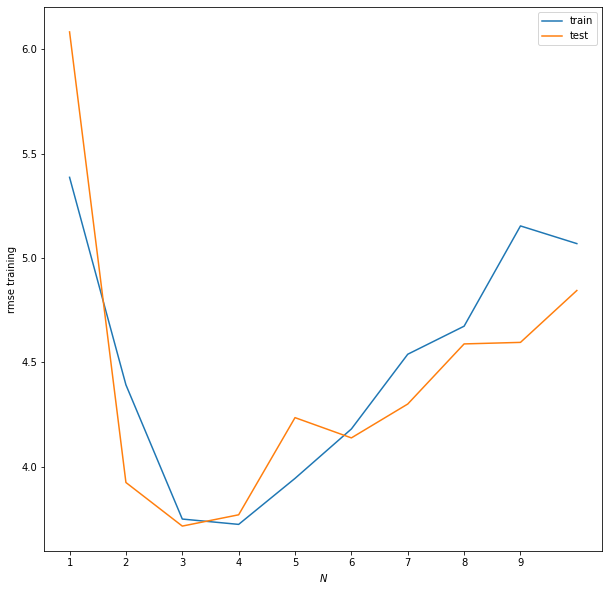

In [45]:
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(results[:,0],results[:,1], label="train")
plt.plot(results[:,0],results[:,2], label="test")
ax.set_xticks(np.arange(1,10))
plt.legend(loc="upper right")
plt.xlabel('$N$')
plt.ylabel("rmse training")
plt.show()

It looks like 3 or 4 are great options.

### Simple Neural Net

In [34]:
all_Xs,all_Ys = get_data_n(3)
predicted_voltage = model.predict(all_Xs) * 100
np.sqrt(np.mean((predicted_voltage-all_Ys)**2))


num cont sequences is 38


3.157476034224053

In [ ]:
# %matplotlib notebook


speed = all_Xs[:,1]
speed2 = all_Xs[:,2]
num_to_plot = 1000
samples_to_plot = np.random.randint(0,len(speed) - num_to_plot)
plt.figure(figsize=(10,10))
# ax = plt.axes(projection='3d')
# print(len(speed))
plt.scatter(speed[samples_to_plot:samples_to_plot+num_to_plot], all_Ys[samples_to_plot:samples_to_plot+num_to_plot])
plt.scatter(speed[samples_to_plot:samples_to_plot+num_to_plot], predicted_voltage[samples_to_plot:samples_to_plot+num_to_plot])

# ax.scatter3D(speed[samples_to_plot:samples_to_plot+num_to_plot], speed2[samples_to_plot:samples_to_plot+num_to_plot], all_Ys[samples_to_plot:samples_to_plot+num_to_plot], cmap='Greens')
# ax.scatter3D(speed[samples_to_plot:samples_to_plot+num_to_plot], speed2[samples_to_plot:samples_to_plot+num_to_plot], predicted_voltage[samples_to_plot:samples_to_plot+num_to_plot], cmap='Red')
# ax.set_xlabel('actual speed', fontsize=20)
# ax.set_ylabel('desired speed', fontsize=20)
# ax.set_zlabel('voltage', fontsize=20);

Weird. But better.

In [20]:
from keras.models import save_model

save_model(model, "contextual_model.h5")